In [2]:
import numpy as np  # Importa la biblioteca NumPy bajo el alias 'np' para realizar cálculos numéricos.
from shapely.ops import split  # Importa la función 'split' desde Shapely para realizar operaciones de división en geometrías.
import geopandas as gpd  # Importa la biblioteca GeoPandas bajo el alias 'gpd' para el análisis de datos geoespaciales.
from shapely.geometry import MultiPolygon, Polygon, LineString  # Importa varios tipos de geometrías desde Shapely para representar formas geométricas en el espacio.


In [3]:
# Ruta del archivo de datos geoespaciales (Shapefile) que se va a leer.
geo_filepath = "ejemploshape/nombre_del_shapefile.shp"

In [4]:
# Lee el archivo Shapefile especificado en 'geo_filepath' y lo carga en un GeoDataFrame (GeoDF).
GeoDF = gpd.read_file(geo_filepath)


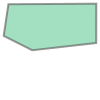

In [5]:
# Selecciona una geometría aleatoria del GeoDataFrame 'GeoDF' y almacénala en la variable 'G'.

G = np.random.choice(GeoDF.geometry.values)
G

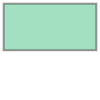

In [6]:
# Calcula la envolvente (rectángulo delimitador) de la geometría almacenada en 'G' y almacena el resultado en 'Rectangle'.
Rectangle = G.envelope
Rectangle

In [7]:
# Longitud del lado de la celda
side_length = 0.5

# Obtiene las coordenadas de la envolvente del rectángulo y las almacena en 'rect_coords'
rect_coords = np.array(Rectangle.boundary.coords.xy)

# Extrae las listas de coordenadas x e y de 'rect_coords'
y_list = rect_coords[1]
x_list = rect_coords[0]

# Calcula los valores mínimos y máximos de las coordenadas y para obtener la altura del rectángulo
y1 = min(y_list)
y2 = max(y_list)

# Calcula los valores mínimos y máximos de las coordenadas x para obtener el ancho del rectángulo
x1 = min(x_list)
x2 = max(x_list)

# Calcula el ancho y la altura del rectángulo
width = x2 - x1
height = y2 - y1

# Calcula el número de celdas en la dirección x e y, redondeando al entero más cercano
xcells = int(np.round(width / side_length))
ycells = int(np.round(height / side_length))

# Crea una serie de índices igualmente espaciados en las direcciones x e y
yindices = np.linspace(y1, y2, ycells + 1)
xindices = np.linspace(x1, x2, xcells + 1)
width,height


(0.08255395811202959, 0.04147623999263317)

In [8]:
# Crea una lista de líneas horizontales que atraviesan el rectángulo delimitador en direcciones verticales.
horizontal_splitters = [
    LineString([(x, yindices[0]), (x, yindices[-1])]) for x in xindices
]

# Imprime la lista de líneas horizontales.
horizontal_splitters

[<LINESTRING (-73.167 -36.744, -73.167 -36.744)>]

In [9]:
# Crea una lista de líneas verticales que atraviesan el rectángulo delimitador en direcciones horizontales.
vertical_splitters = [
    LineString([(xindices[0], y), (xindices[-1], y)]) for y in yindices
]

# Imprime la lista de líneas verticales.
vertical_splitters

[<LINESTRING (-73.167 -36.744, -73.167 -36.744)>]

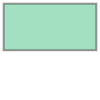

In [10]:
# Asigna la geometría del rectángulo delimitador original a la variable 'result'.
result = Rectangle

# Imprime 'result', que ahora contiene la misma geometría que 'Rectangle'.
result

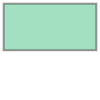

In [11]:
# Itera sobre la lista de líneas verticales 'vertical_splitters' y divide la geometría 'result' en múltiples polígonos.
for splitter in vertical_splitters:
    result = MultiPolygon(split(result, splitter))

# Imprime 'result', que ahora contiene los polígonos resultantes después de la división.
result

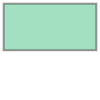

In [12]:
# Itera sobre la lista de líneas horizontales 'horizontal_splitters' y divide la geometría 'result' en múltiples polígonos.
for splitter in horizontal_splitters:
    result = MultiPolygon(split(result, splitter))

# Imprime 'result', que ahora contiene los polígonos resultantes después de la división horizontal y vertical.
result

In [13]:
# Extrae los polígonos individuales del resultado final 'result' y los almacena en la lista 'square_polygons'.
square_polygons = list(result.geoms)

# Imprime 'square_polygons', que ahora contiene los polígonos individuales resultantes.
square_polygons

[<POLYGON ((-73.167 -36.744, -73.167 -36.703, -73.084 -36.703, -73.084 -36.74...>]

In [14]:
# Crea un GeoDataFrame a partir de la lista de polígonos 'square_polygons'.
df = gpd.GeoDataFrame(square_polygons)


In [15]:
# Crea un nuevo GeoDataFrame a partir de la lista de polígonos 'square_polygons'.
SquareGeoDF  = gpd.GeoDataFrame(square_polygons).rename(columns={0: "geometry"})

In [16]:
# Crea un nuevo GeoDataFrame a partir de la lista de polígonos 'square_polygons'.
SquareGeoDF = gpd.GeoDataFrame(square_polygons)

# Establece la geometría del GeoDataFrame en la primera columna (índice 0) de los datos.
SquareGeoDF = SquareGeoDF.set_geometry(0)


In [32]:
# Extrae las geometrías de 'SquareGeoDF' que se intersectan con la geometría 'G' y las almacena en 'Geoms'.
Geoms = SquareGeoDF[SquareGeoDF.intersects(G)].geometry.values

# Define una variable 'shape' con el valor "square".
shape = "square"

# Define una variable 'thresh' con el valor 0.9.
thresh = 0.2

In [34]:
# Si la variable 'shape' es igual a "rhombus", realiza las siguientes operaciones.
if shape == "rhombus":
    # Aplica una función 'rhombus(g)' a cada geometría en 'Geoms' y almacena los resultados en 'Geoms'.
    #Geoms = [rhombus(g) for g in Geoms]
    # Filtra las geometrías en 'Geoms' que cumplen con una condición de área y las almacena en 'geoms'.
    geoms = [g for g in Geoms if ((g.intersection(G)).area / g.area) >= thresh]

# Si la variable 'shape' es igual a "square", realiza las siguientes operaciones.
elif shape == "square":
   
    # Filtra las geometrías en 'Geoms' que cumplen con una condición de área y las almacena en 'geoms'.
    geoms = [g for g in Geoms if ((g.intersection(G)).area / g.area) >= thresh]

geoms

[<POLYGON ((-73.167 -36.744, -73.167 -36.703, -73.084 -36.703, -73.084 -36.74...>]

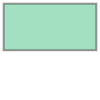

In [35]:
Rectangle

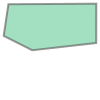

In [36]:
G

In [37]:
grid = gpd.GeoDataFrame({'geometry':geoms})
geoms

[<POLYGON ((-73.167 -36.744, -73.167 -36.703, -73.084 -36.703, -73.084 -36.74...>]

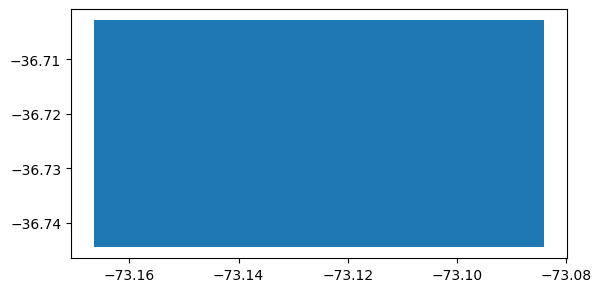

In [38]:
grid.plot();